# ***Engr.Muhammad Javed***

# 03. Pooling Layers

## 1. Theory: Downsampling
Pooling layers are used to reduce the spatial dimensions (Width, Height) of the feature maps. This reduces the number of parameters and computation in the network, and also controls overfitting.

### Types of Pooling:
1. **Max Pooling**: Takes the maximum value from the window. Captures the most prominent features.
2. **Average Pooling**: Takes the average value. Smooths the features.

Pooling also provides **Translation Invariance** - small shifts in the input image don't change the pooled output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load Data
(train_images, _), (_, _) = mnist.load_data()
image = train_images[0]

# Let's first apply a convolution to get a "feature map" to pool
# Using a simple vertical edge filter
kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

def simple_convolve(img, k):
    h, w = img.shape
    kh, kw = k.shape
    oh, ow = h - kh + 1, w - kw + 1
    out = np.zeros((oh, ow))
    for i in range(oh):
        for j in range(ow):
            out[i, j] = np.sum(img[i:i+kh, j:j+kw] * k)
    return out

feature_map = simple_convolve(image, kernel)

print("Feature Map Shape:", feature_map.shape)

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.0 at tensorflow/core/framework/resour

Feature Map Shape: (26, 26)


## 2. Implementing Max Pooling
We will implement a function for Max Pooling with a 2x2 window and stride 2 (standard).

In [2]:
def max_pooling(map_matrix, pool_size=2, stride=2):
    input_h, input_w = map_matrix.shape
    output_h = (input_h - pool_size) // stride + 1
    output_w = (input_w - pool_size) // stride + 1
    
    pooled_map = np.zeros((output_h, output_w))
    
    for i in range(output_h):
        for j in range(output_w):
            row_start = i * stride
            col_start = j * stride
            
            # Extract the window
            window = map_matrix[row_start : row_start + pool_size, 
                                col_start : col_start + pool_size]
            
            # Take the MAX
            pooled_map[i, j] = np.max(window)
            
    return pooled_map

## 3. Visualization
Comparing the Feature Map before and after pooling.

Pooled Output Shape: (13, 13)


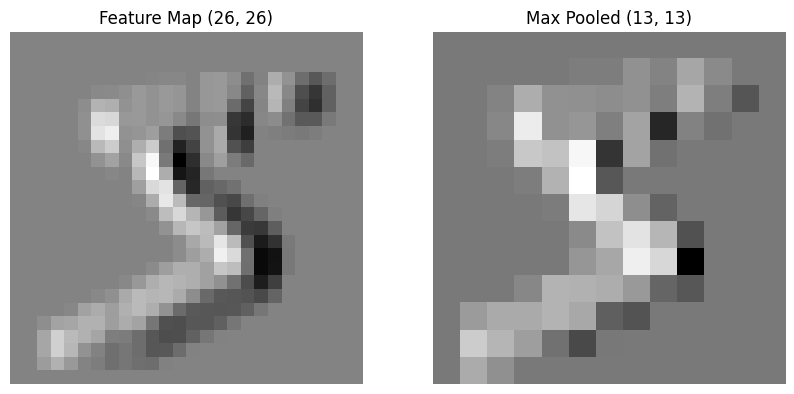

In [3]:
pooled_output = max_pooling(feature_map, pool_size=2, stride=2)

print("Pooled Output Shape:", pooled_output.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(feature_map, cmap='gray')
plt.title(f"Feature Map {feature_map.shape}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pooled_output, cmap='gray')
plt.title(f"Max Pooled {pooled_output.shape}")
plt.axis('off')

plt.show()